In [6]:
print("Hello, World!")

Hello, World!


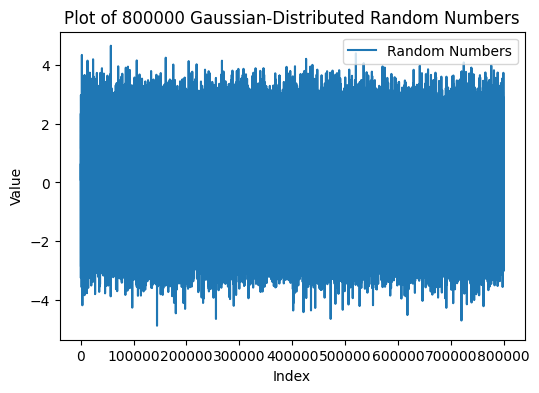

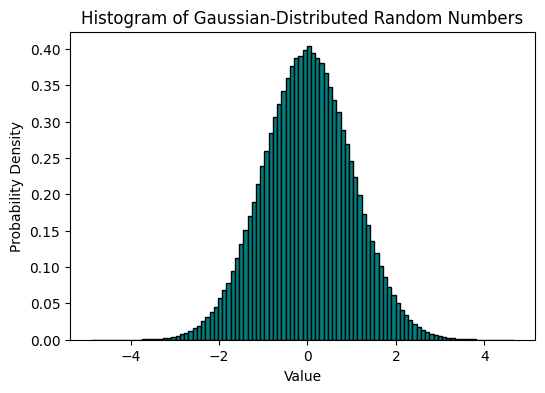

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 800000  # number of samples
mu, sigma = 0, 1  # mean and standard deviation
data = np.random.normal(mu, sigma, N)

# Plot random numbers 
plt.figure(figsize=(6,4))
plt.plot(data, markersize=0.5, label='Random Numbers')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title(f"Plot of {N} Gaussian-Distributed Random Numbers")
plt.legend()
plt.show()

# Histogram 
plt.figure(figsize=(6,4))
plt.hist(data, bins=100, density=True, color='teal', edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Histogram of Gaussian-Distributed Random Numbers")
plt.show()


Example Gaussian steps: [ 0.92309708 -0.30314119 -1.61761032 -0.58365483  1.42290273 -0.88812582
  1.25531624  0.39272508 -0.27391557  0.60066433]


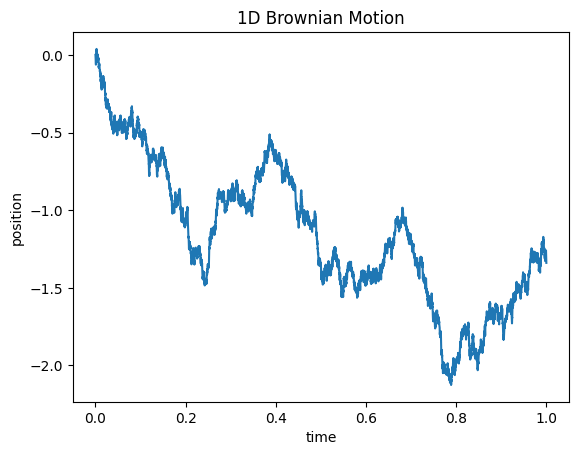

In [8]:
# Random number generator
rng = np.random.default_rng()

# --- Step 1: Generate some Gaussian random numbers ---
# Think of these as "random steps" mostly near 0
samples = rng.normal(loc=0.0, scale=1.0, size=10)
print("Example Gaussian steps:", samples)

T = 1.0          # total time
N = 10000        # number of steps
dt = T / N       # size of each time step
mu = 0.0         # average drift (0 means no bias)
sigma = 1.0      # how strong the random shaking is
x0 = 0.0         # start position

# Random "pushes" at each step, drawn from a Gaussian
increments = rng.normal(loc=mu*dt, scale=sigma*np.sqrt(dt), size=N)

# Add up the pushes to get the walk (path)
path = np.cumsum(np.insert(increments, 0, x0))  # cumulative sum

time = np.linspace(0, T, N+1)
plt.plot(time, path)
plt.xlabel("time")
plt.ylabel("position")
plt.title("1D Brownian Motion")
plt.show()



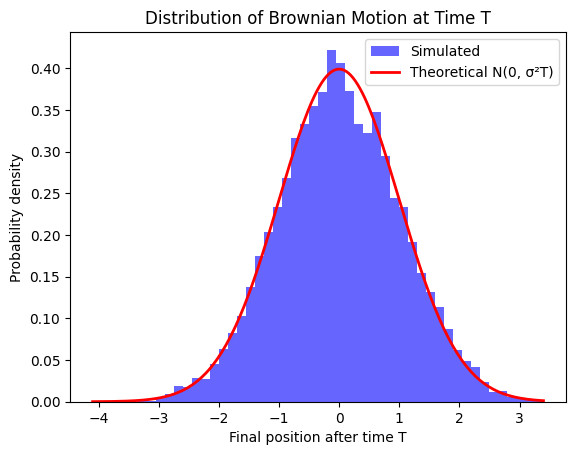

In [9]:
#probability density 

rng = np.random.default_rng()

# Parameters
T = 1.0
N = 1000
dt = T / N
mu = 0.0
sigma = 1.0
x0 = 0.0

# simulate paths
num_paths = 10_000  # how many independent walks
increments = rng.normal(loc=mu*dt, scale=sigma*np.sqrt(dt), size=(num_paths, N))
paths = np.cumsum(increments, axis=1) + x0

# Final positions of all paths (at time T)
final_positions = paths[:, -1]

# histogram
plt.hist(final_positions, bins=50, density=True, alpha=0.6, color='blue', label="Simulated")

# Gaussian overlay
from scipy.stats import norm
x = np.linspace(final_positions.min(), final_positions.max(), 200)
theoretical_pdf = norm.pdf(x, loc=mu*T, scale=sigma*np.sqrt(T))
plt.plot(x, theoretical_pdf, 'r-', lw=2, label="Theoretical N(0, σ²T)")

# Labels
plt.title("Distribution of Brownian Motion at Time T")
plt.xlabel("Final position after time T")
plt.ylabel("Probability density")
plt.legend()
plt.show()